In [1]:
import pickle
from pathlib import Path
import pandas as pd 
import os
import sys
import matplotlib.pyplot as plt

In [2]:
import data_set_analysis_helper_functions as ahf

In [3]:
seq_str = '0a1b2a3b4abcde5a6a7b'
period_of_interest = "Real_nTrials"
HowManyBack=1
folderName="dual_color_photo_full_data_set" #folder where the plot data_set will be saved 
path = "/Volumes/GilInVivoPaper.large/2.Photometry_in_str/2.dual_color_photo_full_data_set_analysis/"

In [4]:
# Parameters
seq_str = "0a1d2a3b4abcde5a6a7b"
HowManyBack = 1
folderName = "dual_color_photo_full_data_set"
path = "/Volumes/GilInVivoPaper.large/2.Photometry_in_str/2.dual_color_photo_full_data_set_analysis/"
period_of_interest = "combined_periods_1"


In [5]:
sys.executable

'/anaconda3/bin/python3'

# Import the data and where to save it 

In [6]:
path_to_save = path+"/"+folderName+"/"+seq_str #also for loading

# Import the data and where to save it 

In [7]:
%%time
root = Path(path_to_save)
d = "data_set"+"_"+seq_str+'.pickle'
my_path = root / d 
fileToOpen = open(my_path, 'rb')
data_set = pickle.load(fileToOpen)

CPU times: user 17.6 s, sys: 1.04 s, total: 18.7 s
Wall time: 18.7 s


In [8]:
y_axis_list = ["df_f","z_score","z_score_sliding_window"]

In [9]:
alphabet = ["a","b","c","d","e","f","g"]
y_axis = y_axis_list[alphabet.index(seq_str[:seq_str.index('4')][-1])]
print (y_axis)

z_score


In [10]:
#period_of_interest="combined_periods_1"
#period_of_interest = "pre_firstENLp_tag"
#period_of_interest="last_200_bins_ENL_tag"
#period_of_interest = "first_15_bins_Cue_to_Sel_tag"
#period_of_interest="first_15_bins_Cue_to_Sel_fromPrevTrial_tag"
#period_of_interest="Real_nTrials"
#period_of_interest="Cue_to_Sel_tag"
#period_of_interest="Cue_to_Sel_fromPrevTrial_tag"

In [11]:
# stash result in a cache directory, for how many back. 
cache_dir_plt = os.path.join(path_to_save,period_of_interest)
if not os.path.exists(cache_dir_plt):
    os.makedirs(cache_dir_plt)

In [12]:
cache_dir_plt

'/Volumes/GilInVivoPaper.large/2.Photometry_in_str/2.dual_color_photo_full_data_set_analysis//dual_color_photo_full_data_set/0a1d2a3b4abcde5a6a7b/combined_periods_1'

# generate data sets of interest

In [13]:
r_ls_period_d1_data_set= ahf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,0,
                                                                           period_of_interest,"d1 R")

In [14]:
r_ls_period_d2_data_set= ahf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,0,
                                                                           period_of_interest,"d2 R")

In [15]:
r_wr_period_d1_data_set= ahf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,3,
                                                                           period_of_interest,"d1 R")

In [16]:
r_wr_period_d2_data_set= ahf.extract_data_of_interest_ipsi_contra_data_set(data_set,
                                                                           0,3,
                                                                           period_of_interest,"d2 R")

# Calculate means per each session 

In [17]:
r_ls_period_d1_df = ahf.calculate_mean_data_set(r_ls_period_d1_data_set)

In [18]:
r_ls_period_d2_df = ahf.calculate_mean_data_set(r_ls_period_d2_data_set)

In [19]:
r_wr_period_d1_df = ahf.calculate_mean_data_set(r_wr_period_d1_data_set)

In [20]:
r_wr_period_d2_df = ahf.calculate_mean_data_set(r_wr_period_d2_data_set)

# Calculate means and sem on the data set 

In [21]:
r_ls_period_d1_mean_sem = ahf.calculate_mean_sem (r_ls_period_d1_df)

In [22]:
r_ls_period_d2_mean_sem = ahf.calculate_mean_sem (r_ls_period_d2_df)

In [23]:
r_wr_period_d1_mean_sem = ahf.calculate_mean_sem (r_wr_period_d1_df)

In [24]:
r_wr_period_d2_mean_sem = ahf.calculate_mean_sem (r_wr_period_d2_df)

# make_sem_traces

In [25]:
r_ls_period_d1_sem_traces = ahf.make_sem_traces(r_ls_period_d1_mean_sem)

In [26]:
r_ls_period_d2_sem_traces = ahf.make_sem_traces(r_ls_period_d2_mean_sem)

In [27]:
r_wr_period_d1_sem_traces = ahf.make_sem_traces(r_wr_period_d1_mean_sem)

In [28]:
r_wr_period_d2_sem_traces = ahf.make_sem_traces(r_wr_period_d2_mean_sem)

# plots

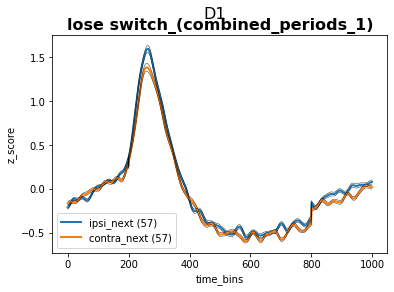

In [29]:
ahf.plot_ipsi_contra_together(r_ls_period_d1_mean_sem,
                              r_ls_period_d1_sem_traces,
                              "lose switch",period_of_interest,"D1",y_axis,cache_dir_plt)

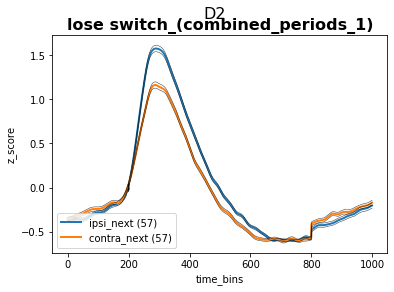

In [30]:
ahf.plot_ipsi_contra_together(r_ls_period_d2_mean_sem,
                              r_ls_period_d2_sem_traces,
                              "lose switch",period_of_interest,"D2",y_axis,cache_dir_plt)

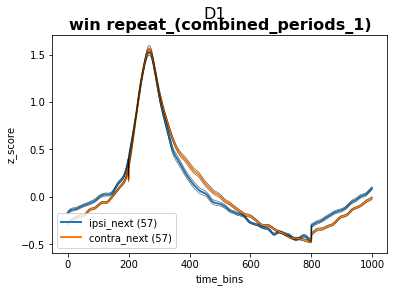

In [31]:
ahf.plot_ipsi_contra_together(r_wr_period_d1_mean_sem,
                              r_wr_period_d1_sem_traces,
                              "win repeat",period_of_interest,"D1",y_axis,cache_dir_plt)

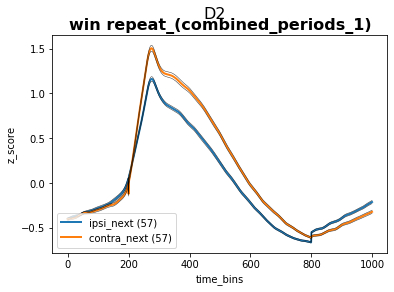

In [32]:
ahf.plot_ipsi_contra_together(r_wr_period_d2_mean_sem,
                              r_wr_period_d2_sem_traces,
                              "win repeat",period_of_interest,"D2",y_axis,cache_dir_plt)